## CLEANING ARTICLE80 DEVELOPMENT PROJECTS

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
directory = '/content/drive/MyDrive/City of Boston: Permitting D/Project Files/data/cleaned_a80.csv'

In [19]:
df = pd.read_csv(directory, encoding='utf-8')
df.head()

,objectid,projectid,name,zipcode,neighborhood,recordtype,status,fdate,badate,fbpdate,...,baday,fbpyear,fbpmonth,fbpday,coopyear,coopmonth,coopday,lpuyear,lpumonth,lpuday
0,21411,2501,Jackson Square Recreation Center,2119.0,Roxbury,NPC,Board Approved,2016-12-15,2011-06-16,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21412,2502,Brooke Charter High School,2124.0,Mattapan,Large Project,Construction Complete,2016-12-09,2017-03-16,2017-06-22,...,16.0,2017.0,6.0,22.0,2018.0,8.0,21.0,2017.0,4.0,20.0
2,21413,2508,1000 Boylston Street,2115.0,Back Bay,Large Project,Board Approved,2017-01-05,2018-03-15,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,5.0,28.0
3,21414,2509,Allston Yards Building B,2134.0,Allston,Large Project,Board Approved,2018-01-22,2019-12-12,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,1.0,27.0
4,21415,2510,Wentworth Multipurpose Academic Building,2215.0,Mission Hill,Large Project,Construction Complete,2017-01-13,2017-05-11,2017-08-09,...,11.0,2017.0,8.0,9.0,2018.0,11.0,8.0,2017.0,6.0,29.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   objectid        1769 non-null   int64  
 1   projectid       1769 non-null   int64  
 2   name            1769 non-null   object 
 3   zipcode         1334 non-null   float64
 4   neighborhood    1767 non-null   object 
 5   recordtype      1769 non-null   object 
 6   status          1769 non-null   object 
 7   fdate           897 non-null    object 
 8   badate          1198 non-null   object 
 9   fbpdate         726 non-null    object 
 10  coopdate        617 non-null    object 
 11  lpudate         933 non-null    object 
 12  grosssqft       1758 non-null   float64
 13  description     1457 non-null   object 
 14  lat             1762 non-null   float64
 15  lon             1762 non-null   float64
 16  grossfloorarea  1515 non-null   float64
 17  rndsqft         1205 non-null   f

<ipython-input-21-fdaca7aa1031>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


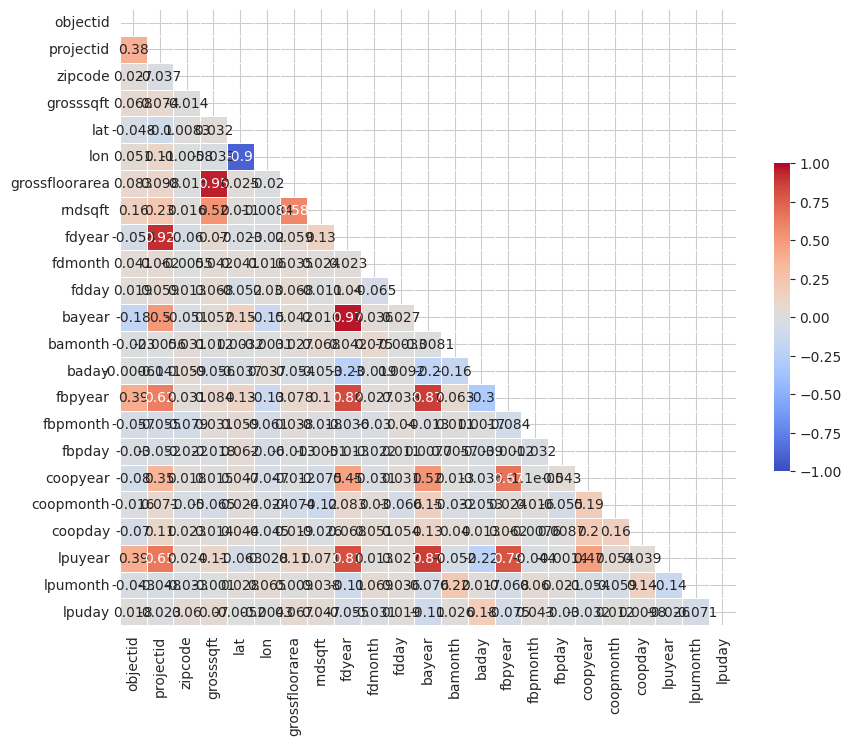

In [21]:
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Show the plot
plt.show()

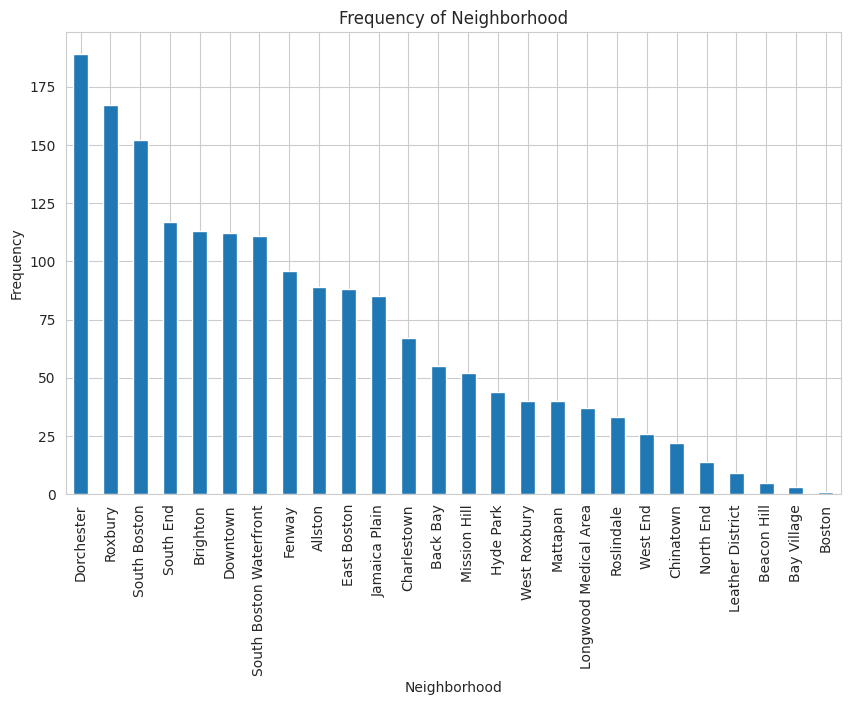

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
counts = df['neighborhood'].value_counts()

counts.plot(kind='bar')

plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.title('Frequency of Neighborhood')
plt.show()


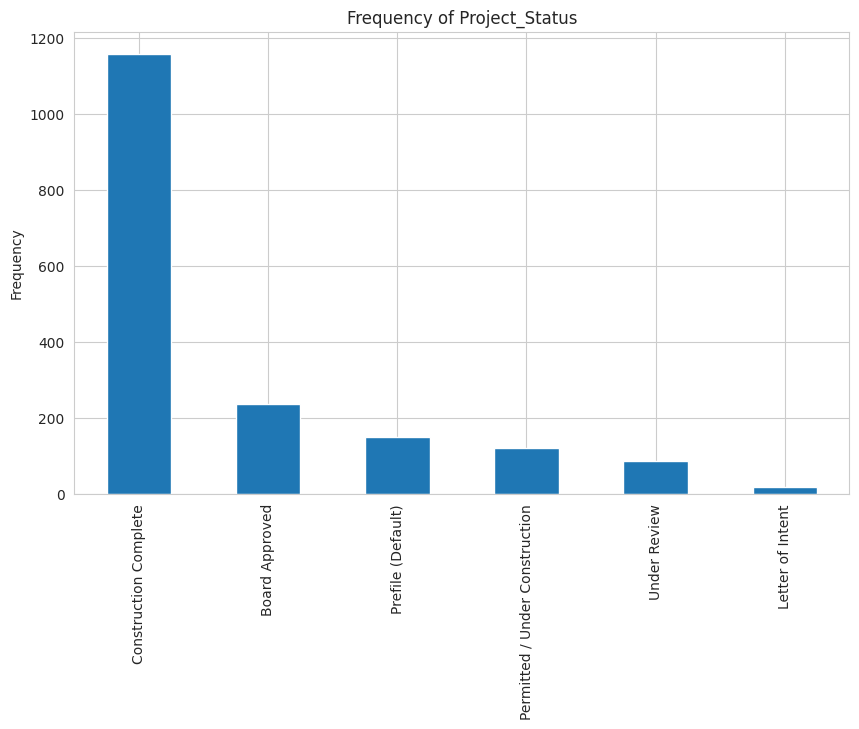

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
counts = df['status'].value_counts()

counts.plot(kind='bar')

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Project_Status')
plt.show()


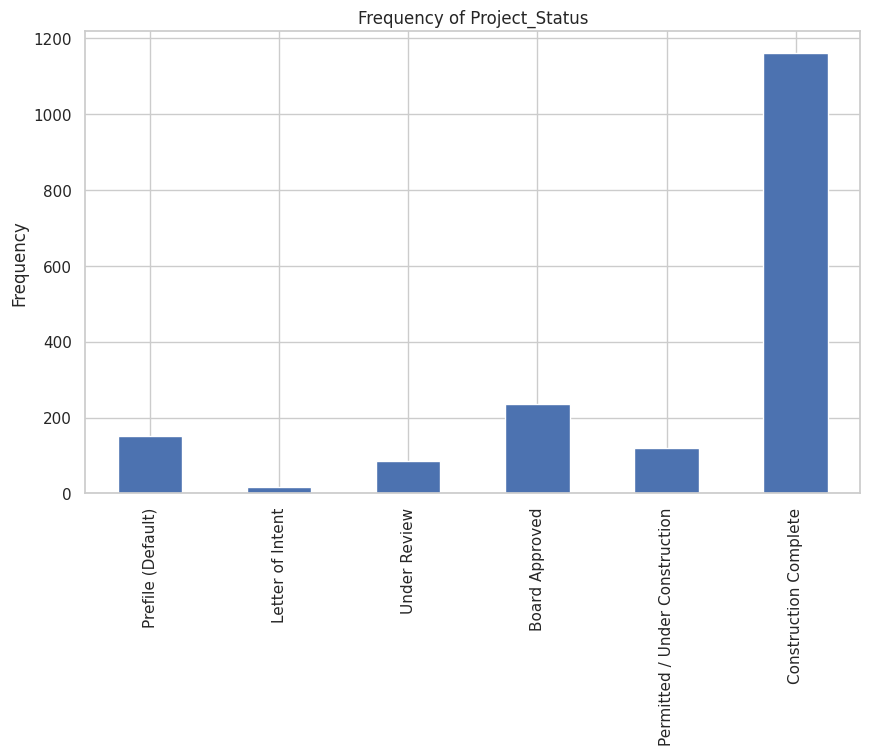

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define your custom order
custom_order = ['Prefile (Default)', 'Letter of Intent','Under Review', 'Board Approved', 'Permitted / Under Construction', 'Construction Complete'] # replace with your actual statuses

# Count the values excluding 'Construction Complete'
# counts = df.status.loc[df['status'] != 'Construction Complete'].value_counts()

# Reindex the counts series according to your custom order
sorted_counts = df.status.reindex(custom_order)

# Plot
sorted_counts.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Project_Status')
plt.show()


In [35]:
df.status.unique()

array(['Board Approved', 'Construction Complete', 'Prefile (Default)',
       'Permitted / Under Construction', 'Under Review',
       'Letter of Intent'], dtype=object)

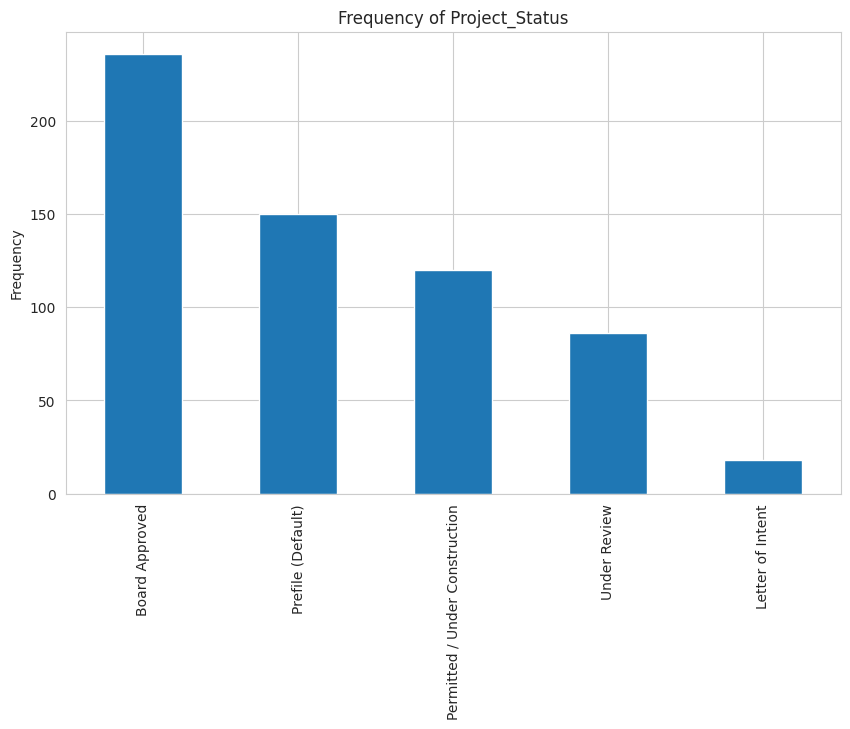

In [25]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

counts = df.status.loc[df['status'] != 'Construction Complete'].value_counts()

counts.plot(kind='bar')

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Project_Status')
plt.show()

<Figure size 1000x600 with 0 Axes>

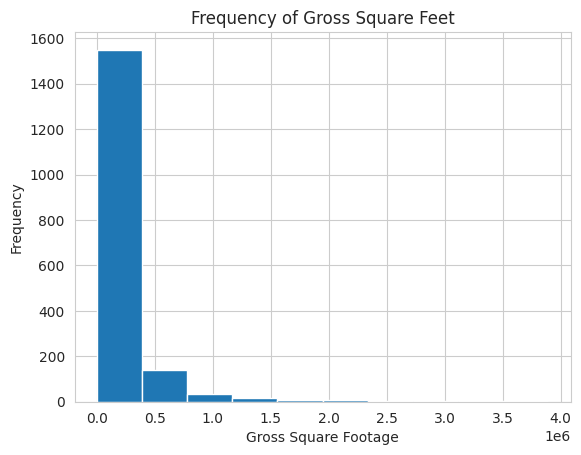

In [26]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

histogram=df.hist(column='grosssqft')
histogram[0][0].set_xlabel('Gross Square Footage')
histogram[0][0].set_ylabel('Frequency')
plt.title('Frequency of Gross Square Feet')
plt.show()


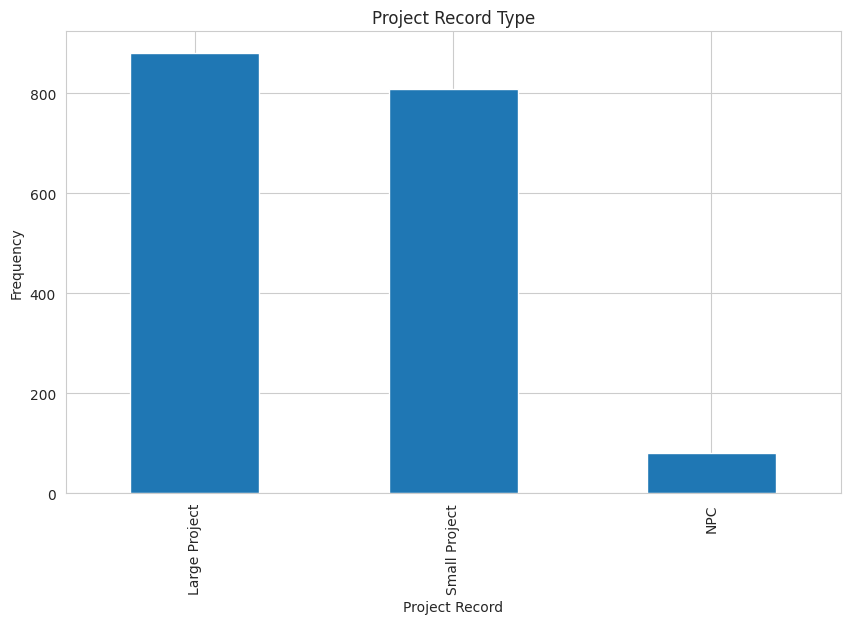

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

counts = df['recordtype'].value_counts()

counts.plot(kind='bar')

plt.xlabel('Project Record')
plt.ylabel('Frequency')
plt.title('Project Record Type')
plt.show()

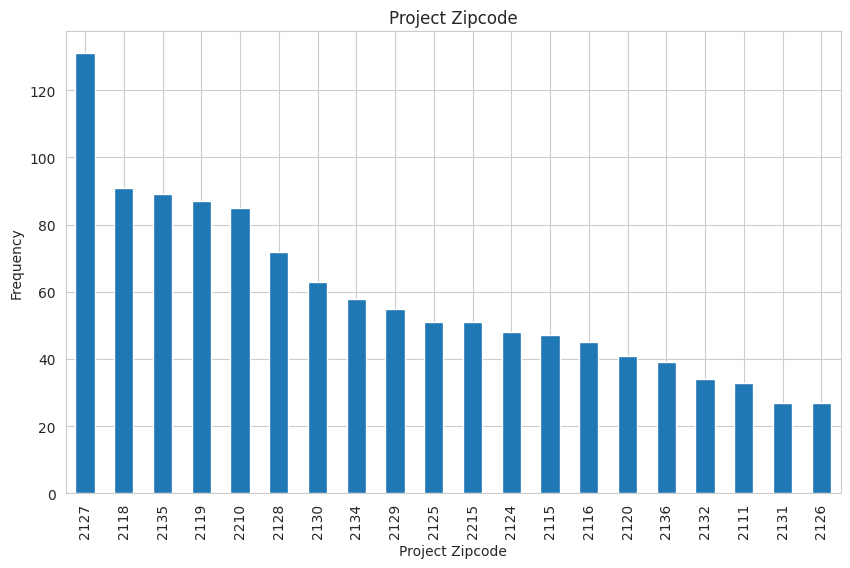

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

counts = df['zipcode'].astype('Int64').value_counts().nlargest(20)

counts.plot(kind='bar')

plt.xlabel('Project Zipcode')
plt.ylabel('Frequency')
plt.title('Project Zipcode')
plt.show()

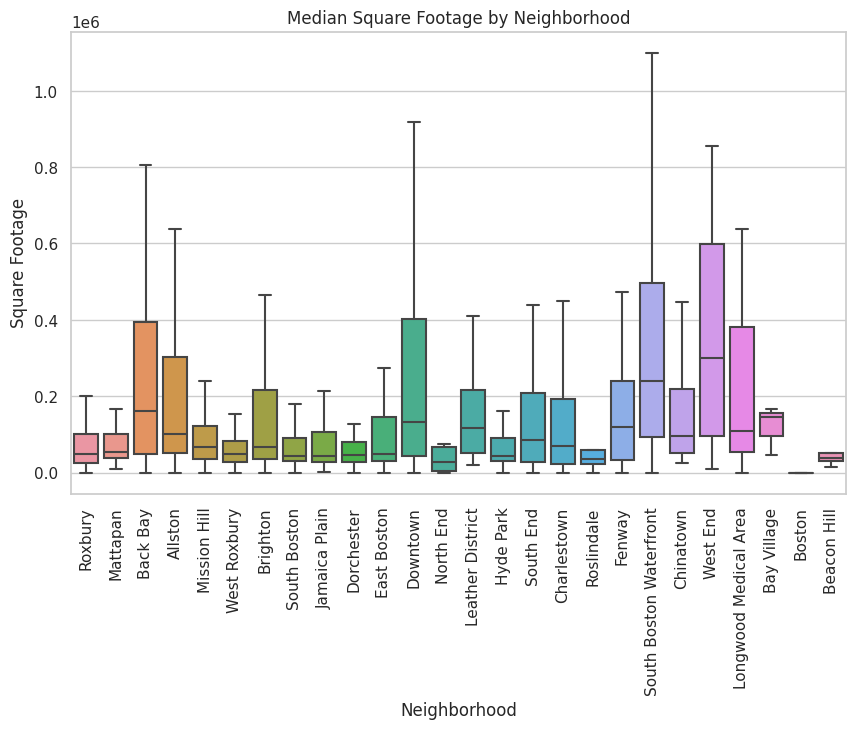

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x="neighborhood", y="grosssqft", data=df, showfliers=False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Neighborhood')
plt.ylabel('Square Footage')
plt.title('Median Square Footage by Neighborhood')

plt.show()


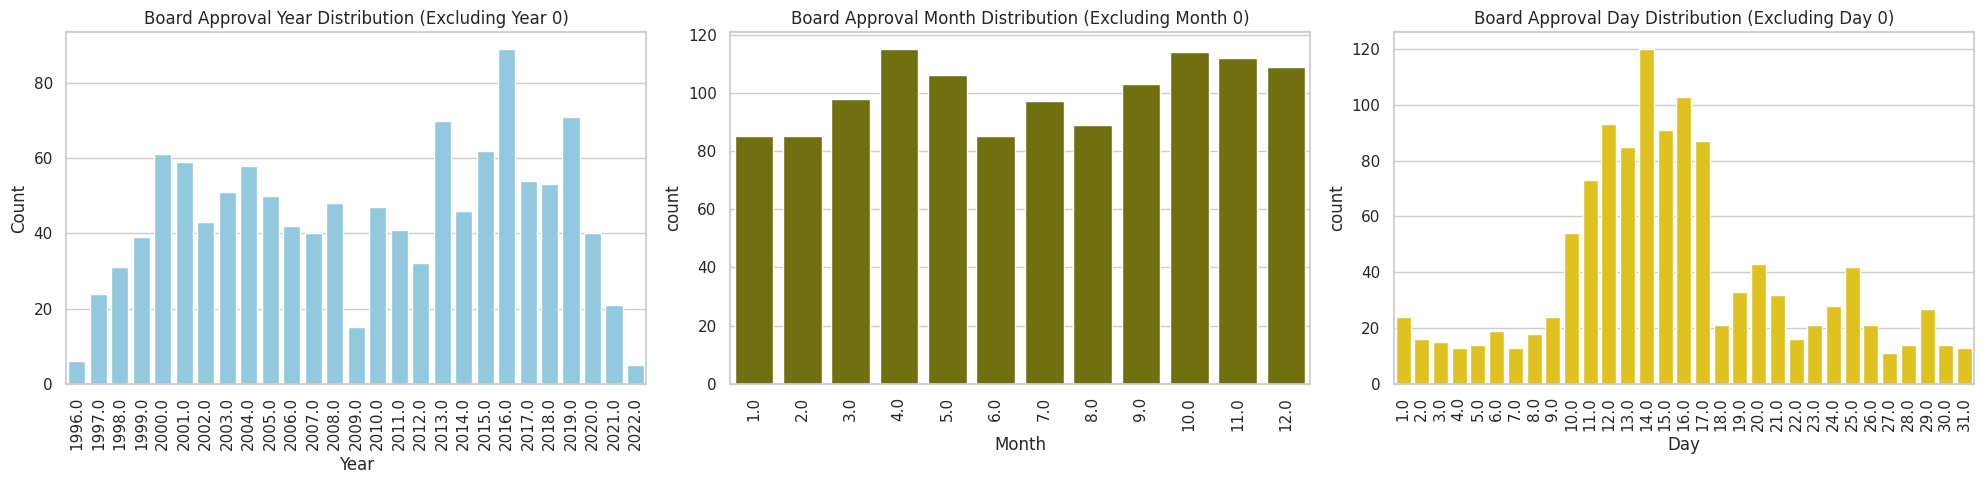

In [30]:
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='bayear', data=df[df['bayear'] != 0], color="skyblue")
plt.title('Board Approval Year Distribution (Excluding Year 0)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.countplot(x='bamonth', data=df[df['bamonth'] != 0], color="olive")
plt.title('Board Approval Month Distribution (Excluding Month 0)')
plt.xlabel('Month')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.countplot(x='baday', data=df[df['baday'] != 0], color="gold")
plt.title('Board Approval Day Distribution (Excluding Day 0)')
plt.xlabel('Day')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-31-388dcff675f2>:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


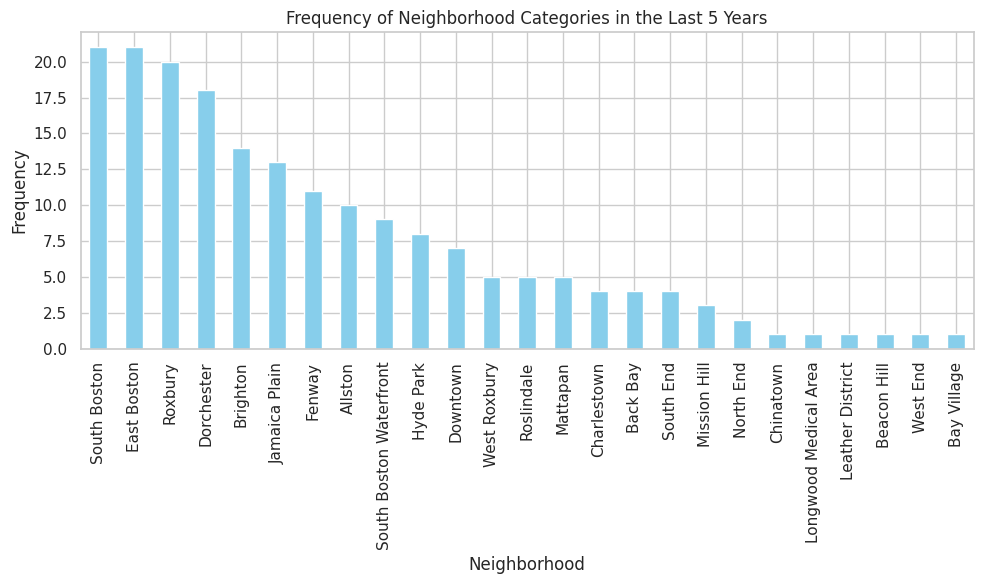

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


current_year = pd.to_datetime('now').year
last_5_years = df[df['bayear'] >= current_year - 5]

neighborhood_counts = last_5_years['neighborhood'].value_counts()

plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.title('Frequency of Neighborhood Categories in the Last 5 Years')

plt.tight_layout()
plt.show()


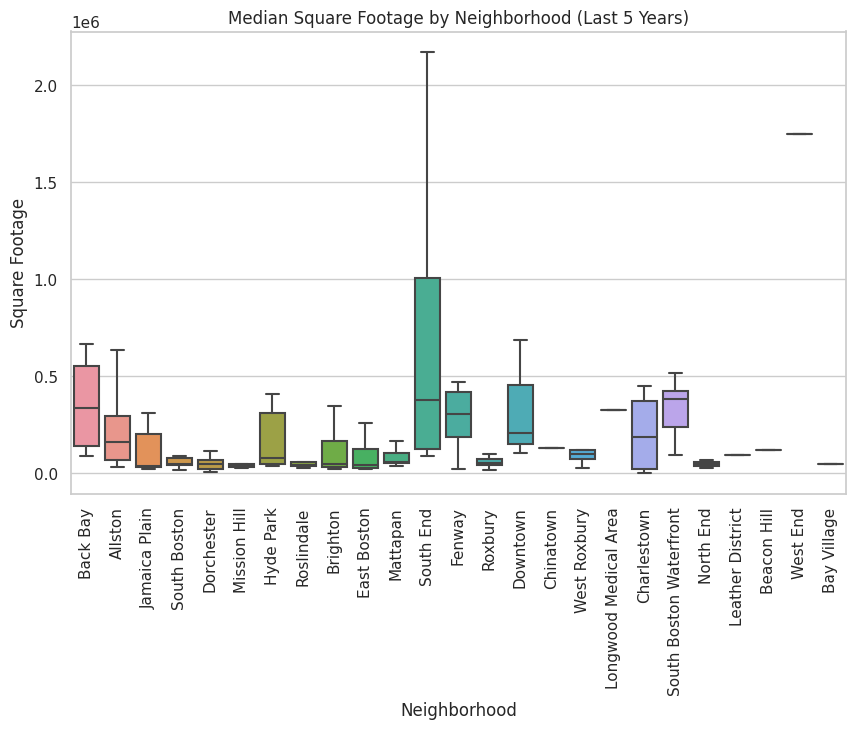

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x="neighborhood", y="grosssqft", data=last_5_years, showfliers=False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Neighborhood')
plt.ylabel('Square Footage')
plt.title('Median Square Footage by Neighborhood (Last 5 Years)')

plt.show()


In [33]:
import pandas as pd

temp = pd.to_datetime(df['badate'])

first_date = temp.min()
last_date = temp.max()

print("First Date:", first_date)
print("Last Date:", last_date)


First Date: 1996-08-15 00:00:00
Last Date: 2022-03-10 00:00:00
